## PROBLEM STATEMENT
Now-a-days due to COVID-19(Corona Virus) every person must wear a mask.

Our goal is to train a custom deep learning model to detect whether a person is wearing a mask or is not wearing a mask.



### Importing the libraries

In [ ]:
import os
import matplotlib.pyplot as plt

### Loading the DataSet

In [ ]:
!git clone https://github.com/prajnasb/observations.git 

Cloning into 'observations'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 1638 (delta 9), reused 0 (delta 0), pack-reused 1604
Receiving objects: 100% (1638/1638), 75.94 MiB | 12.58 MiB/s, done.
Resolving deltas: 100% (20/20), done.


#### Reading directories


In [ ]:
pwd

'/content'

In [ ]:
os.listdir("/content")

['.config', 'observations', 'sample_data']

In [ ]:
os.listdir("/content/observations")

['README.md', '.git', 'experiements', 'mask_classifier']

In [ ]:
os.listdir("/content/observations/experiements")

['dest_folder', 'data']

In [ ]:
os.listdir("/content/observations/experiements/dest_folder")

['train.csv', 'train', 'val', 'test.csv', 'test']

In [ ]:
os.listdir("/content/observations/experiements/dest_folder/train")

['without_mask', 'with_mask']

In [ ]:
os.listdir("/content/observations/experiements/dest_folder/test")

['without_mask', 'with_mask']

In [ ]:
os.listdir("/content/observations/experiements/dest_folder/val")

['without_mask', 'with_mask']

##### Length of dataset(No.of images )

In [ ]:
#With Mask
print(len(os.listdir("/content/observations/experiements/data/with_mask")))

690


In [ ]:
#Without Mask
print(len(os.listdir("/content/observations/experiements/data/without_mask")))

686


### Filename

#### Loading Data

In [ ]:
base_dir = "/content/observations/experiements/dest_folder"
train_dir = os.path.join(base_dir,'train') 
test_dir = os.path.join(base_dir,'test')
validation_dir = os.path.join(base_dir,'val')
train_with_mask_dir = os.path.join(train_dir,'with_mask')
train_without_mask_dir = os.path.join(train_dir,'without_mask')
test_with_mask_dir = os.path.join(test_dir,'with_mask')
test_without_mask_dir = os.path.join(test_dir,'without_mask')
val_with_mask_dir = os.path.join(validation_dir,'with_mask')
val_without_mask_dir = os.path.join(validation_dir,'without_mask')

In [ ]:
#Filenames
with_mask_filename = os.listdir(train_with_mask_dir)
with_mask_filename[:4]

['augmented_image_36.jpg',
 'augmented_image_35.jpg',
 '276-with-mask.jpg',
 'augmented_image_273.jpg']

In [ ]:
without_mask_filename = os.listdir(train_without_mask_dir)
without_mask_filename[:10]

['augmented_image_36.jpg',
 '6.jpg',
 '422.jpg',
 'augmented_image_35.jpg',
 '123.jpg',
 '158.jpg',
 '323.jpg',
 '111.jpg',
 '461.jpg',
 '97.jpg']

###  Display image with mask

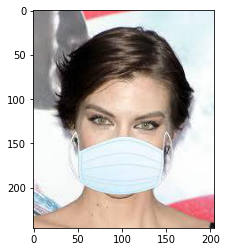

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(train_with_mask_dir+'/augmented_image_108.jpg'))

### Display image without mask




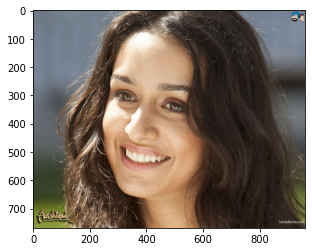

In [ ]:
plt.imshow(plt.imread(train_without_mask_dir+'/435.jpg'))

### Display of set of images with mask


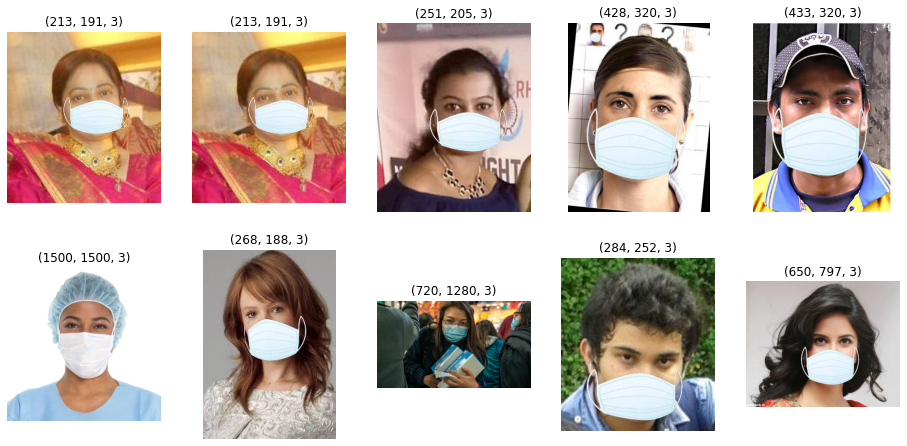

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in range(10):
  img = plt.imread(os.path.join(train_with_mask_dir,with_mask_filename[i]))
  plt.subplot(4,5,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j += 1

### Display of set of images without mask

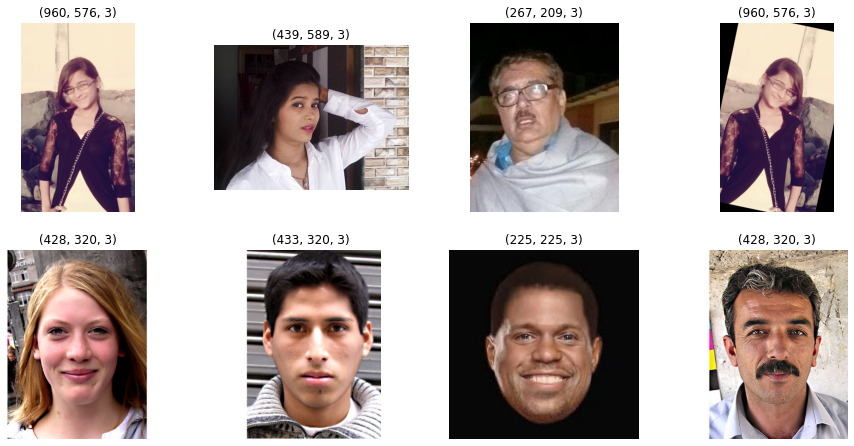

In [ ]:
plt.figure(figsize=(16,16))
j = 1
for i in range(8):
  img = plt.imread(os.path.join(train_without_mask_dir,without_mask_filename[i]))
  plt.subplot(4,4,j)
  plt.imshow(img)
  plt.title(img.shape)
  plt.axis('off')
  j += 1

Data Preprocessing
- Read the image data
- We have different shapes here.
- We need same shape for each image
- reshaing the images





### Creating Train and valiadtion data from Folder

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 1315 images belonging to 2 classes.
Found 142 images belonging to 2 classes.


In [ ]:
train_generator

(20, 150, 150, 3)
(20,)


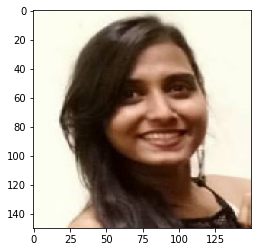

In [ ]:
imgs,labels = train_generator.next()
print(imgs.shape)
print(labels.shape)
plt.imshow(imgs[0,:,:,:])

#### Displaying random images of with mask and without mask

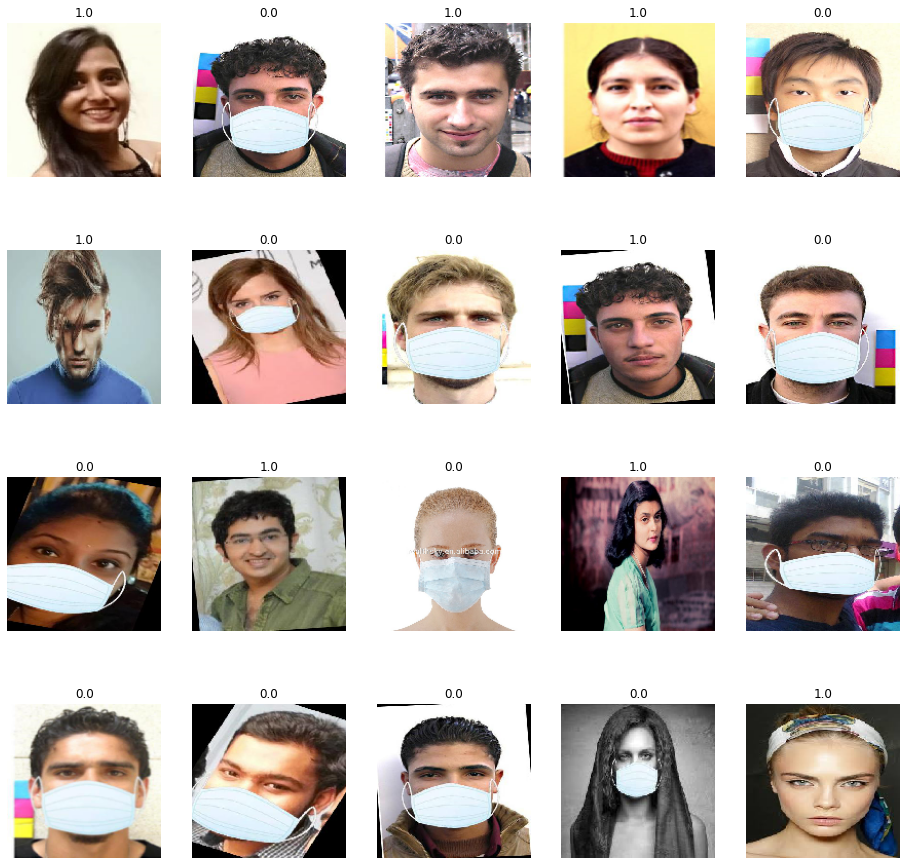

In [ ]:
plt.figure(figsize=(16,16))
pos=1 ##plot position
for i in range(20):
  plt.subplot(4,5,pos)
  plt.imshow(imgs[i,:,:,:])# To display the image
  plt.title(labels[i])
  plt.axis('off')
  pos+=1

### Histogram of dataset

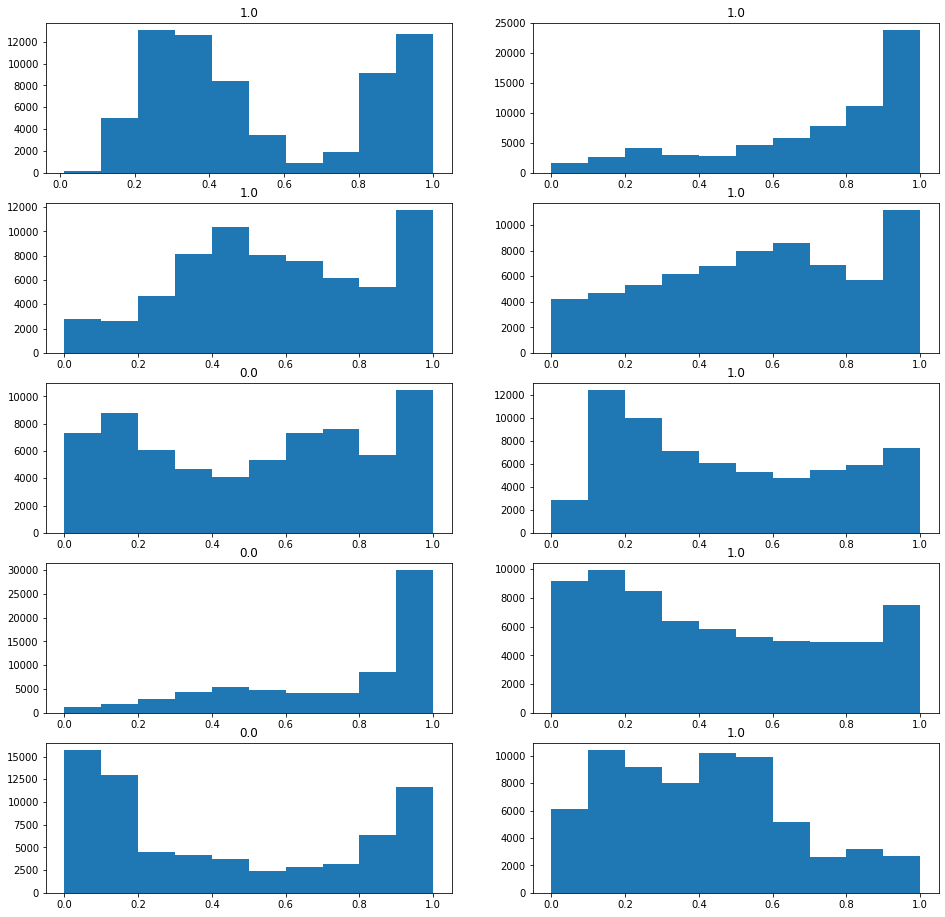

In [ ]:
import matplotlib.pyplot as plt
imgs,labels = train_generator.next()
plt.figure(figsize=(16,16))
pos = 1  ## plot position
for i in range(10):
  plt.subplot(5,2,pos)
  plt.hist(imgs[i,:,:,:].flat) # To display the histogram
  plt.title(labels[i])
  pos += 1

### Build a model

In [ ]:
## import required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [ ]:
model = Sequential()
## add a conv layer folloed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer folloed by maxpooling
model.add(Conv2D(32,3,activation='relu'))
model.add(MaxPooling2D(2))
## add a conv layer folloed by maxpooling
model.add(Conv2D(64,3,activation='relu'))
model.add(MaxPooling2D(2))
# Convert the faeturemap into 1D array
model.add(Flatten())
# Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
## Final output layer
model.add(Dense(1,activation='sigmoid'))

## let us see the the summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

#### Compiling the model


In [ ]:
### Compiling the model
import tensorflow as tf
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

### Train the Model

In [ ]:
history = model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)


Epoch 1/15
66/66 [==============================] - 35s 526ms/step - loss: 0.5196 - accuracy: 0.7840 - val_loss: 0.1156 - val_accuracy: 0.9648
Epoch 2/15
66/66 [==============================] - 34s 522ms/step - loss: 0.1858 - accuracy: 0.9308 - val_loss: 0.0605 - val_accuracy: 0.9718
Epoch 3/15
66/66 [==============================] - 34s 519ms/step - loss: 0.1075 - accuracy: 0.9605 - val_loss: 0.0439 - val_accuracy: 0.9859
Epoch 4/15
66/66 [==============================] - 34s 518ms/step - loss: 0.0649 - accuracy: 0.9741 - val_loss: 0.0468 - val_accuracy: 0.9789
Epoch 5/15
66/66 [==============================] - 34s 519ms/step - loss: 0.0467 - accuracy: 0.9810 - val_loss: 0.0586 - val_accuracy: 0.9718
Epoch 6/15
66/66 [==============================] - 34s 517ms/step - loss: 0.0561 - accuracy: 0.9833 - val_loss: 0.0320 - val_accuracy: 0.9859
Epoch 7/15
66/66 [==============================] - 34s 514ms/step - loss: 0.0344 - accuracy: 0.9871 - val_loss: 0.0754 - val_accuracy: 0.9789

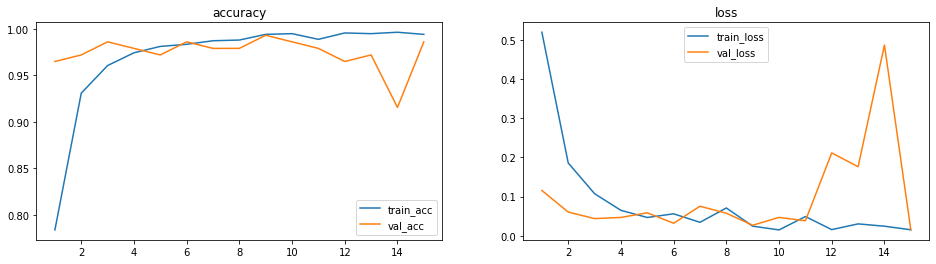

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1,16))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

### Predicting image from Test data
1. Read the image

2. check the shape

3. Resize into required shape(1,1501503)

4. Apply scaling

#### Making a new directory as Random

In [ ]:
!mkdir random 

In [ ]:
!cd random

In [ ]:
pwd

'/content'

#### Moving all the with mask and without mask images of test data to random directory

In [ ]:
!mv /content/observations/experiements/dest_folder/test/with_mask/* random

In [ ]:
!mv /content/observations/experiements/dest_folder/test/without_mask/* random

In [ ]:
len(os.listdir('/content/random'))

194

#### Testing the model for random images 

In [ ]:
import random, os
path = '/content/random'
random_filename = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
])

print(random_filename)

179.jpg


<class 'numpy.ndarray'>
(267, 189, 3)
<class 'numpy.ndarray'>
(150, 150, 3)
(1, 150, 150, 3)


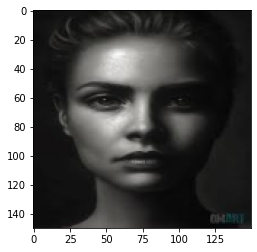

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img = plt.imread(os.path.join('/content/random',random_filename))
print(type(img))
img = tf.keras.preprocessing.image.img_to_array(img)
print(img.shape)
print(type(img))
img = tf.image.resize(img,(150,150))
## Scaling 
img = img/255
print(img.shape)
img = np.expand_dims(img,axis=0)
print(img.shape)
plt.imshow(img[0,:,:,:])

In [ ]:
model.predict(img)

array([[0.9984786]], dtype=float32)

In [ ]:
classes = model.predict_classes(img)
print(classes)
if (classes==1):
  print("with out mask")
else :
  print("with mask")


[[1]]
with out mask
